In [ ]:
import pandas as pd
data_train = pd.read_csv('/home/sedtha/Documents/ITC/AI/KH_char/kh_char_train.csv', header=None, na_filter=False)
data_test = pd.read_csv('/home/sedtha/Documents/ITC/AI/KH_char/kh_char_test.csv', header=None, na_filter=False)

In [ ]:
data_train

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,2304
0,CHHO,218,206,194,194,214,214,210,218,198,...,194,48,0,202,198,198,198,202,198,202
1,TA,241,241,255,255,255,255,255,255,255,...,0,13,45,81,122,136,145,159,163,163
2,NGO,183,163,122,142,142,163,163,163,193,...,142,173,183,183,153,142,142,163,153,153
3,KO,200,204,212,216,212,212,204,204,208,...,135,142,135,142,146,142,131,123,146,154
4,NGO,178,178,178,178,178,178,165,178,191,...,216,216,216,216,204,216,216,216,216,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,CHA,237,241,241,241,241,237,237,237,233,...,224,224,224,228,228,233,228,224,224,224
17357,NGO,139,163,168,197,192,216,226,211,206,...,197,202,197,178,168,192,206,221,206,192
17358,NGO,255,255,255,245,230,225,235,230,230,...,196,201,201,196,210,215,220,220,215,220
17359,TA,199,195,203,203,199,199,199,203,207,...,171,155,155,163,179,183,179,195,199,207


In [ ]:
data_train.value_counts(0)

0
TA      4508
NGO     4296
CHA     2934
DA      1430
KO      1241
NA      1207
KHA     1031
CHHA     386
CHHO     172
KHO      156
Name: count, dtype: int64

In [ ]:
data_train.shape

(17361, 2305)

In [ ]:
import numpy as np

In [ ]:
x_train = data_train.iloc[:, 1:].to_numpy().astype(float)
y_train = data_train.iloc[:, 0].to_list()
x_test = data_test.iloc[:, 1:].to_numpy().astype(float)
y_test = data_test.iloc[:, 0].to_list()


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encode_train = encoder.fit_transform(y_train)
y_encode_test = encoder.fit_transform(y_test)

'TA'

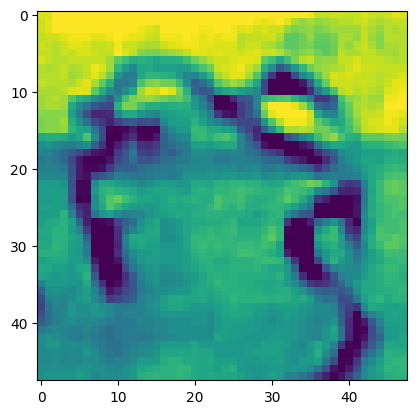

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1].reshape(48,48))
y_train[1]

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch

class Kh(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x/255.0, dtype = torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.x)

    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]



In [ ]:
data_train = Kh(x_train, y_encode_train)
train_loader = DataLoader(data_train, batch_size=128, shuffle=True)

In [ ]:
import  torch
import torch.nn as nn
import torch.optim as optim

class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(2304, 392)
    self.fc2 = nn.Linear(392, 196)
    self.fc3 = nn.Linear(196, 98)
    self.fc4 = nn.Linear(98, 10)
    self.relu = nn.ReLU()

  def forward(self, x):
      x = self.fc1(x)
      x = self.relu(x)

      x = self.fc2(x)
      x = self.relu(x)

      x = self.fc3(x)
      x = self.relu(x)

      x = self.fc4(x)
      return x



In [ ]:
x = torch.rand(20,2304)
zfnet = MyModel()
output = zfnet(x)
print(output.shape)  # Expected output: torch.Size([20, 10])

torch.Size([20, 10])


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

net = MyModel().to(device)
history = []
cf = nn.CrossEntropyLoss().to(device)
opt = optim.Adam(net.parameters(),lr=0.001)

net.train()

for epoch in range(20):
    for i, (b_x, b_y) in enumerate(train_loader):
        b_x, b_y = b_x.to(device), b_y.to(device)
        b_output = net(b_x)
        loss = cf(b_output, b_y)

        if i % 20 == 0:
            print('Epoch: %02d, i: %02d, Loss: %.8f' % (epoch, i, loss.item()))

        loss.backward()
        history.append(loss.item())
        opt.step()
        opt.zero_grad()


Epoch: 00, i: 00, Loss: 2.31762505
Epoch: 00, i: 20, Loss: 1.76641023
Epoch: 00, i: 40, Loss: 1.36511087
Epoch: 00, i: 60, Loss: 1.15348315
Epoch: 00, i: 80, Loss: 1.10933101
Epoch: 00, i: 100, Loss: 0.95799524
Epoch: 00, i: 120, Loss: 0.86143285
Epoch: 01, i: 00, Loss: 0.85028023
Epoch: 01, i: 20, Loss: 0.84806460
Epoch: 01, i: 40, Loss: 0.76626581
Epoch: 01, i: 60, Loss: 0.63527536
Epoch: 01, i: 80, Loss: 0.59155589
Epoch: 01, i: 100, Loss: 0.66393250
Epoch: 01, i: 120, Loss: 0.52264512
Epoch: 02, i: 00, Loss: 0.69230866
Epoch: 02, i: 20, Loss: 0.62818265
Epoch: 02, i: 40, Loss: 0.67404282
Epoch: 02, i: 60, Loss: 0.67412072
Epoch: 02, i: 80, Loss: 0.50321555
Epoch: 02, i: 100, Loss: 0.57967407
Epoch: 02, i: 120, Loss: 0.57933253
Epoch: 03, i: 00, Loss: 0.61435980
Epoch: 03, i: 20, Loss: 0.52736211
Epoch: 03, i: 40, Loss: 0.55014795
Epoch: 03, i: 60, Loss: 0.58245158
Epoch: 03, i: 80, Loss: 0.44758052
Epoch: 03, i: 100, Loss: 0.61707997
Epoch: 03, i: 120, Loss: 0.74079335
Epoch: 04, i

In [ ]:
data_test = Kh(x_test, y_encode_test)
test_loader = DataLoader(data_test, batch_size=64, shuffle=True)

In [ ]:
net.eval()
val_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for b_x, b_y in test_loader:
        b_x, b_y = b_x.to(device), b_y.to(device)
        b_output = net(b_x)
        loss = cf(b_output, b_y)
        val_loss += loss.item()


        _, predicted = torch.max(b_output, 1)
        total += b_y.size(0)
        correct += (predicted == b_y).sum().item()

avg_val_loss = val_loss / len(test_loader)
accuracy = 100 * correct / total

print(f'Validation Loss: {avg_val_loss:.8f}, Accuracy: {accuracy:.2f}%')


Validation Loss: 0.34531910, Accuracy: 88.37%


In [ ]:
# torch.save(net.state_dict(), "KH_CHAR_state_dict.pth")

In [ ]:

model = MyModel()
model.load_state_dict(torch.load("KH_CHAR_state_dict.pth"))
model.to(device)
model.eval()

correct = 0
total = 0
val_loss = 0.0


with torch.no_grad():
    for b_x, b_y in test_loader:
        b_x, b_y = b_x.to(device), b_y.to(device)

        b_output = model(b_x)

        loss = cf(b_output, b_y)
        val_loss += loss.item()

        _, predicted = torch.max(b_output, 1)
        total += b_y.size(0)
        correct += (predicted == b_y).sum().item()

avg_val_loss = val_loss / len(test_loader)
accuracy = 100 * correct / total

print(f"Validation Loss: {avg_val_loss:.8f}, Accuracy: {accuracy:.2f}%")


/tmp/ipykernel_10197/89245705.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("KH_CHAR_state_dict.pth"))


Validation Loss: 0.34713443, Accuracy: 88.37%


# SUMMARY OF STRUCTURE CNN

In [ ]:
from torchsummary import summary
summary(net,input_size=(1,2304))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 392]         903,560
              ReLU-2               [-1, 1, 392]               0
            Linear-3               [-1, 1, 196]          77,028
              ReLU-4               [-1, 1, 196]               0
            Linear-5                [-1, 1, 98]          19,306
              ReLU-6                [-1, 1, 98]               0
            Linear-7                [-1, 1, 10]             990
Total params: 1,000,884
Trainable params: 1,000,884
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params size (MB): 3.82
Estimated Total Size (MB): 3.84
----------------------------------------------------------------


# Testing With Some Image

In [ ]:
label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
label_mapping


{np.str_('CHA'): 0,
 np.str_('CHHA'): 1,
 np.str_('CHHO'): 2,
 np.str_('DA'): 3,
 np.str_('KHA'): 4,
 np.str_('KHO'): 5,
 np.str_('KO'): 6,
 np.str_('NA'): 7,
 np.str_('NGO'): 8,
 np.str_('TA'): 9}

Original image size: (371, 364)
Tensor shape after transformation: torch.Size([1, 2304])
Prediction confidence (percentile): 100.00%
Predicted class index: 7


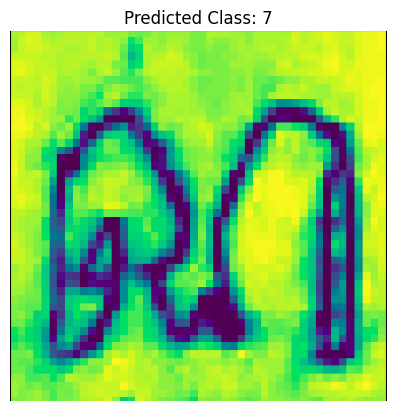

In [ ]:
from PIL import Image
import torch.nn.functional as F
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.Grayscale(1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))

])

image_path = r'/home/sedtha/Documents/ITC/AI/KH_char/1.png'
img = Image.open(image_path)

print(f"Original image size: {img.size}")

img_tensor = transform(img).unsqueeze(0).to(device)
img_tensor = img_tensor.reshape(1,-1)
print(f"Tensor shape after transformation: {img_tensor.shape}")

with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)
    probabilities = F.softmax(output, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1).item()
    confidence = probabilities[0, predicted_class].item()
    print(f"Prediction confidence (percentile): {confidence * 100:.2f}%")

class_idx = predicted.item()
print(f"Predicted class index: {class_idx}")


plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {class_idx}")
plt.show()

Original image size: (377, 375)
Tensor shape after transformation: torch.Size([1, 2304])
Prediction confidence (percentile): 92.78%
Predicted class index: 9


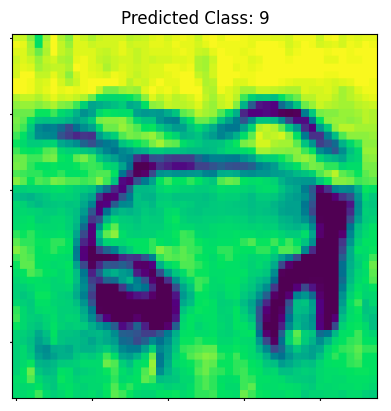

In [ ]:
image_path = r'/home/sedtha/Documents/ITC/AI/KH_char/4.png'
img = Image.open(image_path)

print(f"Original image size: {img.size}")

img_tensor = transform(img).unsqueeze(0).to(device)
img_tensor = img_tensor.reshape(1,-1)
print(f"Tensor shape after transformation: {img_tensor.shape}")

with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)
    probabilities = F.softmax(output, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1).item()
    confidence = probabilities[0, predicted_class].item()
    print(f"Prediction confidence (percentile): {confidence * 100:.2f}%")

class_idx = predicted.item()
print(f"Predicted class index: {class_idx}")


plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {class_idx}")
plt.show()